<a href="https://colab.research.google.com/github/jamilaHa/The-Sparks-Foundation/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Spark Foundation-GRIP- Data Science and Business Analytics

##Task1: Prediction using supervized machine learning

---


##AUTHOR: Jamila Hamdi
##Dataset link: http://bit.ly/w-data
##Problem statement: predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## Importing libraries

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

##Reading and loading the data

In [ ]:
student=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully!")

student

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Dataset information

In [ ]:
#overall dataset information
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
student.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
student.shape

(25, 2)

#Checking for missing values

In [ ]:
student.isnull().values.any()

False

##Plot the data on 2-D graph

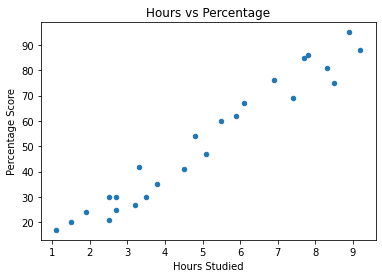

In [ ]:
student.plot.scatter(x='Hours', y='Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The above scatter graph presents the relation between Hours and Scores.

#The distribution of our variables (hours and scores)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef9dac350>,
      dtype=object)

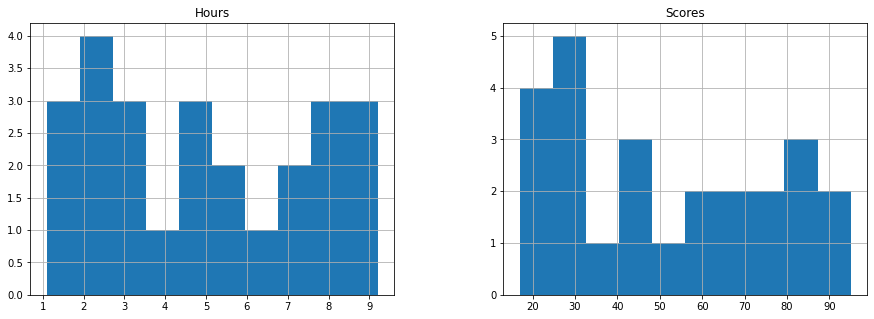

In [ ]:
student.hist(['Hours','Scores'], figsize=(15,5))

## Seperating the dataset into train and test set

In [ ]:
X = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values  

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
#importing the necessary library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

### **Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression  

regressionModel = LinearRegression()  
regressionModel.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

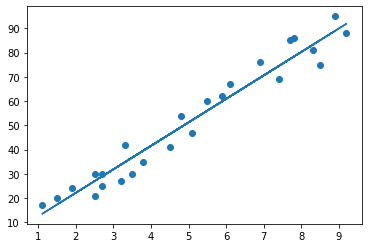

In [ ]:
# Plotting the regression line
line = regressionModel.coef_*X+regressionModel.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#Predicting on test data
Now let's make some predictions

In [ ]:
print(X_test) 
y_pred = regressionModel.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


Let's Compare the actual values  versus the predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


#predicting a score for 9.25 hours

In [ ]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressionModel.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


### **Evaluating the model by calculating the mean absolute error**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
